Non-ML Approach for Music Transcription
This method extracts musical notes from an audio file using signal processing techniques. It works best for monophonic melodies (single notes at a time) but struggles with polyphonic music (chords).

Step 1: Convert Audio to a Spectrogram
A spectrogram represents frequencies over time. We extract it using Short-Time Fourier Transform (STFT).

✅ What this does: Converts the audio into a visual form that represents different frequencies over time.

Step 2: Detect Note Frequencies
To extract musical notes, we use Harmonic-Percussive Source Separation (HPSS) and then identify peaks in frequency content.

✅ What this does: Isolates the harmonic (musical) part of the sound and extracts dominant frequencies at each time step.

Step 3: Filter Notes to Improve Accuracy
Since real-world audio contains noise, we apply smoothing to remove false notes.

✅ What this does: Eliminates random noise by keeping only frequently occurring notes.

Step 4: Save Notes as a MIDI File
Once we have the notes, we can convert them into a MIDI file.

✅ What this does: Converts detected notes into a playable MIDI file.

Limitations of This Approach
❌ Cannot handle chords (polyphonic music) – This method assumes one note at a time.
❌ Struggles with background noise – May detect incorrect notes if the audio is not clean.
❌ Limited timing accuracy – Does not capture note durations well.

Next Steps: Improving with Machine Learning
If the goal is to transcribe polyphonic music (multiple notes at once), we can switch to deep learning models like:
✅ Onsets & Frames (Google Magenta) – Best for transcribing complex piano music.
✅ Transformer-based models – Learn note sequences better than rule-based methods.

In [4]:
# Re-run the WAV file generation since the execution state was reset

import numpy as np
from scipy.io.wavfile import write

# Define parameters for WAV file
sample_rate = 44100  # Sampling rate in Hz
duration = 0.5  # Duration of each note in seconds
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00]  # C4, D4, E4, F4, G4

# Generate sine wave for each note and concatenate
audio = np.array([])
for freq in frequencies:
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * freq * t)  # Generate sine wave
    audio = np.concatenate((audio, wave))

# Normalize and convert to 16-bit PCM format
audio = (audio * 32767).astype(np.int16)

# Save to WAV file
wav_path = "music.wav"
write(wav_path, sample_rate, audio)
wav_path


'music.wav'

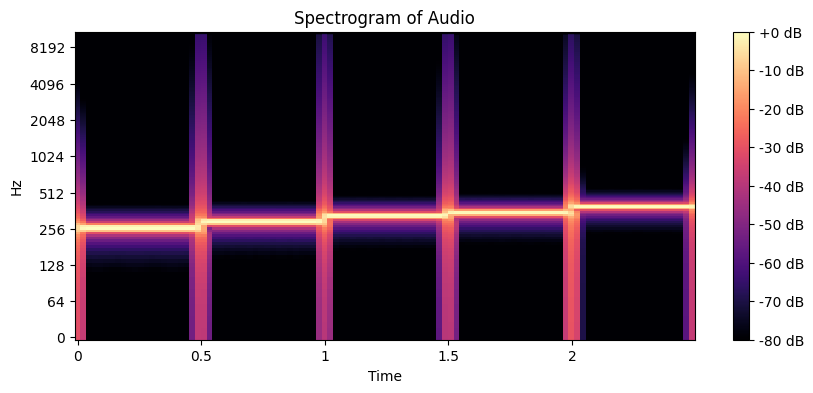

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_path = "music.wav"  # Replace with your file
y, sr = librosa.load(audio_path)

# Compute Spectrogram
D = np.abs(librosa.stft(y))

# Display Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Audio")
plt.show()


In [6]:
# Harmonic-Percussive Separation
harmonic, percussive = librosa.effects.hpss(y)

# Find peaks in frequency content
frequencies, magnitudes = librosa.piptrack(y=harmonic, sr=sr)

# Extract dominant frequencies (potential notes)
def get_notes(frequencies, magnitudes):
    notes = []
    for t in range(frequencies.shape[1]):
        idx = magnitudes[:, t].argmax()
        freq = frequencies[idx, t]
        if freq > 0:  # Ignore zero values
            notes.append(librosa.hz_to_note(freq))  # Convert Hz to musical note
    return notes

detected_notes = get_notes(frequencies, magnitudes)
print("Detected Notes:", detected_notes)


Detected Notes: ['C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'E4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4', 'G4']


In [7]:
from collections import Counter

# Count occurrences of each note
note_counts = Counter(detected_notes)

# Keep only frequent notes (remove noise)
filtered_notes = [note for note, count in note_counts.items() if count > 5]  # Adjust threshold

print("Filtered Notes:", filtered_notes)


Filtered Notes: ['C4', 'D4', 'E4', 'F4', 'G4']


In [8]:
from music21 import stream, note

# Create a new MIDI stream
melody = stream.Stream()
for n in filtered_notes:
    melody.append(note.Note(n))  # Add notes to the MIDI stream

# Save as MIDI file
melody.write("midi", fp="transcribed_music.mid")
print("MIDI file saved: transcribed_music.mid")


MIDI file saved: transcribed_music.mid


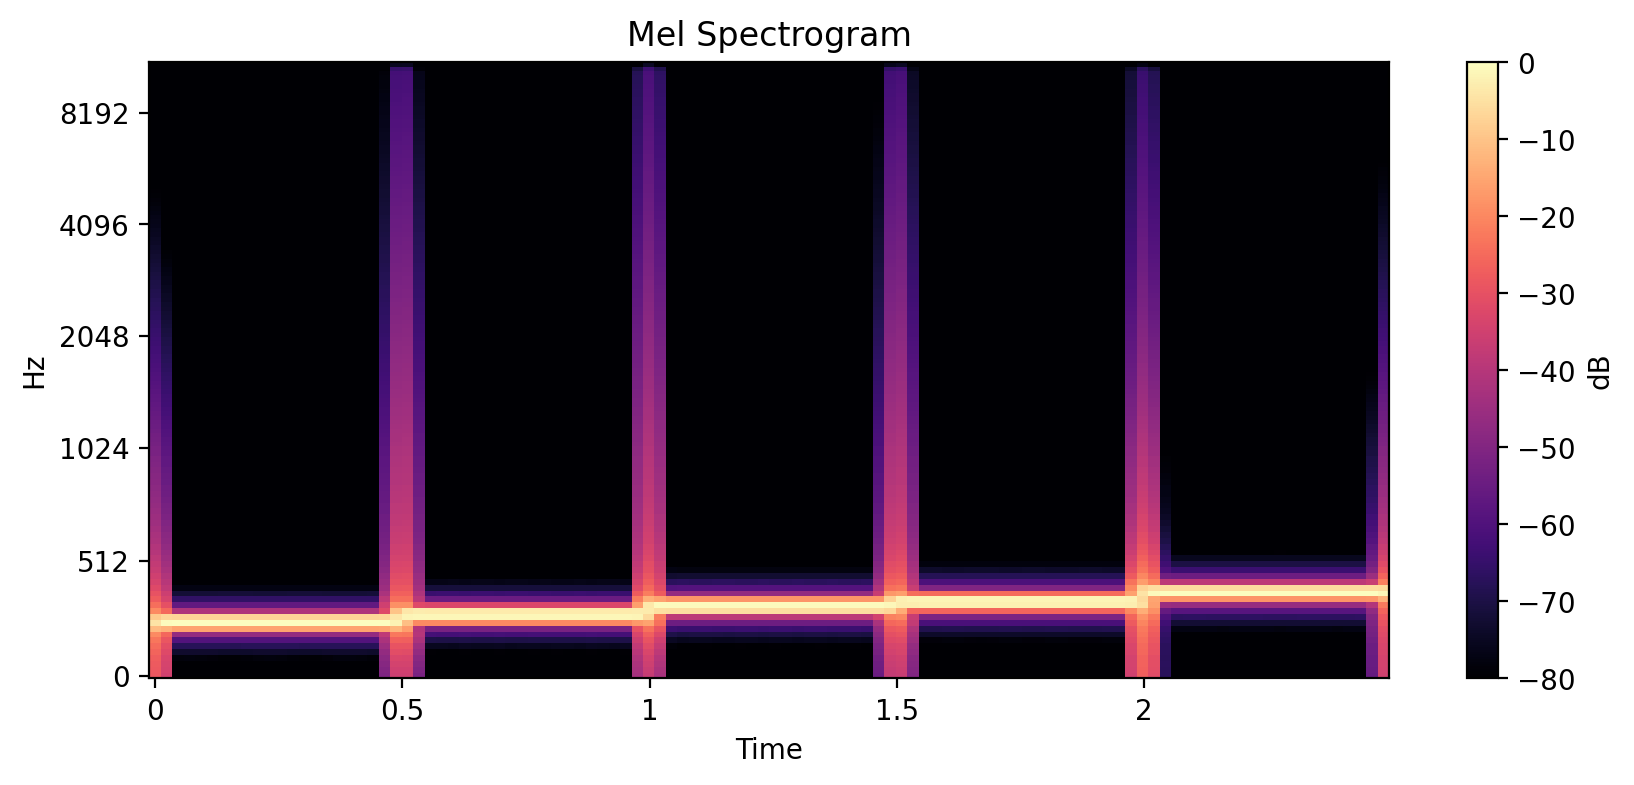

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load("music.wav")

# Convert to Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to decibels
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(label="dB")
plt.title("Mel Spectrogram")
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, TimeDistributed

# Define the model
model = Sequential([
    # CNN layers for feature extraction
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2,2)),
    Flatten(),

    # LSTM for time-series note prediction
    LSTM(128, return_sequences=True),
    LSTM(128),

    # Fully connected layer for output notes
    Dense(88, activation='softmax')  # 88 possible piano notes
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (using spectrograms as X, MIDI notes as Y)
# model.fit(X_train, Y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 127008)